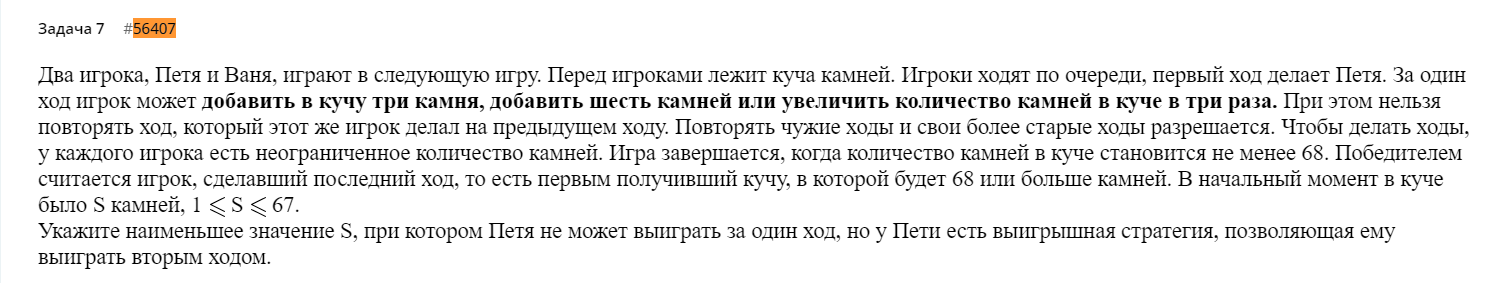

In [ ]:
def f(a, enemy_player_last_step, our_player_last_step):
    if a > 68:
        return 0
    n = []
    if our_player_last_step != '+3':
        n += [f(a + 3, '+3', enemy_player_last_step)]
    if our_player_last_step != '+6':
        n += [f(a + 6, '+6', enemy_player_last_step)]
    if our_player_last_step != '*3':
        n += [f(a * 3, '*3', enemy_player_last_step)]
    t = [i for i in n if i <= 0]
    if t:
        return -max(t) + 1
    else:
        return -max(n)


for i in range(1, 67 + 1):
    if f(i, ' ', ' ') == 2:
        print(i)


Я создал две переменные, которые хранят последний ход нашего игрока и последний ход вражеского игрока. Провожу проверку: если наш предыдущий ход был не '+3', то можно добавить '+3' к куче. Таким же образом поступаю с двумя оставшимися командами. Внутри `n = [...]` я рекурсивно вызываю функцию, добавляя '+3' (наш ход) в вражеский последний ход, а в наш последний ход кладу вражеский последний ход. Трудно объяснить, но при вызове рекурсии Петя и Ваня по очереди ходят, поэтому игра рассматривается сначала от Пети, а затем от Вани.

![image.png](attachment:image.png)

In [ ]:
from functools import *


@lru_cache(None)
def f(a, b):
    if a + b > 60:
        return 0

    n = []

    if a > b:
        for x in range(1, a + 1):
            n += [f(a + x, b)]

    if b > a:
        for x in range(1, b + 1):
            n += [f(a, b + x)]

    if a == b:
        for x in range(1, a + 1):
            for y in range(1, b + 1):
                n += [f(a + x, b + y)]

    t = [i for i in n if i <= 0]

    if t:
        return -max(t) + 1
    else:
        return -max(n)


'''
for s1 in range(1, 60 + 1):
    for s2 in range(1, 60 + 1):
        if f(s1, s2) == 1:
            print(s1 + s2)
            exit()
'''

![image.png](attachment:image.png)

In [ ]:
from itertools import *


def f(a, b): return a != b[:len(a)] and b != a[:len(b)]


jn = ''.join
ans = 'КОЛЛАЖ'
l = sorted('АЛО', key=ans.count)
s = 'Ж10 К00'
b = {c[0]: c[1:] for c in s.split()}
codes = [jn(p) for k in range(1, 6) for p in product('01', repeat=k) if all(f(b[x], jn(p)) for x in b)]


def F(d, unused, ll='1' * 100):
    if len(unused) == 0:
        return sum(len(d[c]) for c in ans)
    return min(
        (F({**d, unused[0]: c}, unused[1:], c) for c in codes if int(ll) > int(c) and all(f(c, d[x]) for x in d)),
        default=10 ** 50)


print(F(b, l))

![image.png](attachment:image.png)

In [ ]:
d = dict()
with open('26-96.txt') as f:
    N = int(f.readline())
    for _ in range(N):
        x, y = map(int, f.readline().split())
        d[y] = d.get(y, []) + [x // 10 if x >= 0 else -(abs(x) // 10)]

ans = [0, 0, 0]
ml = None
for x, y in sorted(d.items()):
    if len(y) >= ans[1]:
        ans = [x, len(y), len(set(y))]
print(ans[0], ans[2])


![image.png](attachment:image.png)

In [ ]:
with open('26s.txt') as f:
    N, M = map(int, f.readline().split())
    data = []
    for _ in range(N):
        t = f.readline().split()
        price, type = int(t[0]), t[1]
        data.append((price, type))
data.sort()
S = sorted([x for x in data if x[1] == "S"])
W = sorted([x for x in data if x[1] == "W"])
nS, nW, s = 0, 0, 0
for price, type in data:
    if s + price <= M:
        s += price
        if type == "S":
            nS += 1
        if type == "W":
            nW += 1
W = W[:nW][::-1]
S = S[nS:]

for i in range(min(len(S), len(W))):
    currSumm = s
    currSumm -= W[i][0]
    currSumm += S[i][0]
    if currSumm <= M:
        s = currSumm
        nS += 1
        nW -= 1
print(nS, M - s)
#https://stepik.org/lesson/743853/step/12?unit=745619

![image.png](attachment:image.png)

In [ ]:
with open('26-33198.txt') as f:
    N, M = map(int, f.readline().split())
    data = []
    data210 = []
    for _ in range(N):
        x = int(f.readline())
        if 200 <= x <= 210:
            data210.append(x)
        else:
            data.append(x)
data.sort()
M = M - sum(data210)
S = 0
count = 0
while sum(data[0:count + 1]) <= M:
    S += data[count]
    count += 1

last_ind = len(data)
for i in range(count - 1, 0 - 1, -1):
    S -= data[i]
    need_ind = i
    for j in range(i + 1, last_ind):
        if S + data[j] <= M:
            need_ind = j
    S += data[need_ind]
    last_ind = need_ind
print(count + len(data210), S + sum(data210), )

![image.png](attachment:image.png)

In [ ]:
with open('26_936.txt') as f:
    N, S = map(int, f.readline().split())
    data = []
    for _ in range(N):
        data.append(int(f.readline()))
data.sort(reverse=1)
count, last, summ = 0, 0, 0

while len(data) > 0:
    for i in range(len(data)):
        if summ + data[i] <= S:
            summ += data[i]
            data[i] = 0
    data = [x for x in data if x != 0]
    count += 1
    last = summ
    summ = 0
print(count, last)

![image.png](attachment:image.png)

In [ ]:
with open('26_838.txt') as f:
    N = int(f.readline())
    data = []
    for _ in range(N):
        data.append(int(f.readline()))
data.sort()
disk1 = []
disk2 = []
while len(data) > 0:
    disk1 += [data.pop(-1)]
    while sum(disk2) <= sum(disk1):
        disk2 += [data.pop(0)]

print(len(disk1), len(disk2))

![image.png](attachment:image.png)

In [ ]:
with open('26_2652.txt') as f:
    N = int(f.readline())
    data = []
    for _ in range(N):
        data.append(int(f.readline()))
data.sort()
count = len(set(data))
mx, counter = 0, 0
for i in range(1, N):
    if data[i - 1] == data[i]:
        counter += 1
        mx = max(mx, counter)
    else:
        counter = 1
print(count, mx)

![image.png](attachment:image.png)

In [ ]:
#https://www.youtube.com/watch?v=rSsjUMOY9R8&t=9970

![image.png](attachment:image.png)

In [ ]:
with open('26_813.txt') as f:
    S, N = map(int, f.readline().split())
    data = []
    for _ in range(N):
        data.append(int(f.readline()))
data.sort()
archive = []
while sum(archive) + data[0] <= S:
    for i in range(len(data) - 1, 0, -1):
        if sum(archive) + data[i] <= S:
            archive.append(data.pop(i))
            break
    if sum(archive) + data[0] <= S:
        archive += [data.pop(0)]
print(len(archive), archive[-1])

![image.png](attachment:image.png)

In [ ]:
from itertools import *


def f(x, y, w, z):
    return (not (w <= z)) or (x <= y) or (not (x))


counter = 0
for a1, a2, a3, a4, a5, a6, a7 in product([0, 1], repeat=7):
    table = [(1, a1, a2, a3), (0, 1, 0, a4), (a5, 0, a6, a7)]
    if len(table) == len(set(table)):
        for p in permutations('xywz'):
            if [f(**dict(zip(p, r))) for r in table] == [0, 0, 0]:
                print(p)

![image.png](attachment:image.png)

In [ ]:
from functools import *


@cache
def f(p0, s, l):
    s = ''.join(set(s))
    if l == 9: return len(set(s)) >= 3
    return sum(f(i, s + i, l + 1) for i in '0123456789')


print(sum(f(i, i, 1) for i in '123456789'))

![image.png](attachment:image.png)

In [ ]:
from functools import *


@cache
def f(i, d, l):
    d += int(i)
    if d > 25 or l > 12:
        return 0
    if l == 12 and d <= 25:
        return 1
    return sum(f(i, d, l + 1) for i in '0123456789')


print(sum(f(i, 0, 1) for i in '123456789'))

![image.png](attachment:image.png)

In [ ]:
from functools import *


@cache
def f(digit, ch, nch, k6, l):
    d = int(digit)
    k6 += (d == 6)
    if k6 > 1 or l > 5:
        return 0
    ch += (d if d % 2 == 0 else 0)
    nch += (d if d % 2 != 0 else 0)
    if l == 5 and k6 == 1 and ch < nch:
        return 1
    return sum(f(i, ch, nch, k6, l + 1) for i in '0123456')


print(sum(f(i, 0, 0, 0, 1) for i in '123456'))

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
def f(x, y, k):
    if x >= y: return x == y and k < 5
    return f(x + 3, y, k + 1) + f(x * 4, y, k) + f(x * 5, y, k)


print(f(1, 16, -1000) * f(16, 140, 0) * f(140, 725, -1000))

![image.png](attachment:image.png)

In [ ]:
from functools import *


@lru_cache(None)
def f(s, e, w: tuple):
    s %= 10
    if len(w) > len(set(w)):
        return 0
    if s == e and len(w) > 1:
        return len(w) == len(set(w))

    w += (s,)
    return f(s + 1, e, w) + f(s + 3, e, w) + f(s + 7, e, w)


print(f(1, 1, ()))

In [ ]:
d = lambda x: sorted({j for d in range(2, int(x ** 0.5) + 1) for j in (d, x // d) if x % d == 0})
d(100)

In [ ]:
d = lambda x: sorted({j for d in range(2, int(x ** 0.5) + 1) for j in (d, x // d) if x % d == 0} | {1, x})
d(100)

In [ ]:
def is_prime(x):
    d = set()
    for i in range(2, int(x ** 0.5) + 1):
        if x % i == 0:
            d.add(i)
            d.add(x // i)
    return (len(d) == 0) * 1

In [ ]:
# fd(...) - вперёд
# rt(...) - вправо
# lt(...) - влево
# tracer(0) - отрубает полностью анимацию черепахи
# update() - обновление картинки 
# r - размер одной клетки для удобства подсчета точек
# screensize(1000, 1000) - размер окна 
# goto(x, y) - перейти к координате с точкой (x,y)
# dot(5, "red") - поставить красную точку c размером 5 пикселей

In [ ]:
from turtle import *

tracer(0)
lt(90)
r = 30
t = 30
screensize(1000, 1000)

for i in range(3):
    fd(7 * r)
    rt(90)
fd(8 * r)
for j in range(3):
    lt(90)
    fd(5 * r)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "blue")
update()
exitonclick()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
from turtle import *

tracer(0)
r = 30
t = 30
screensize(1000, 1000)
for i in range(36):
    rt(60)
    fd(1 * r)
    rt(60)
    fd(1 * r)
    rt(270)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "red")
update()
exitonclick()

![image.png](attachment:image.png)

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
r = 70
t = 20
for i in range(10):
    rt(60)
    fd(10 * r)
    rt(60)

up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "red")
update()
exitonclick()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
#fd(200*r) - не нужная команда
r = 10
t = 55
for i in range(200):
    rt(90)
    fd(50 * r)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "green")
update()
exitonclick()

![image.png](attachment:image.png)

In [ ]:
ans = 49 * 49
ans

![image.png](attachment:image.png)

In [ ]:
from turtle import *

tracer(0)
lt(90)
r = 30
t = 40
screensize(3000, 3000)
for i in range(10):
    fd(10 * r)
    rt(45)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(4, "blue")
update()
exitonclick()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
r = 50
t = 40
for i in range(6):
    fd(10 * r)
    rt(90)
fd(2 * r)
rt(90)

for i in range(2):
    fd(15 * r)
    rt(90)
    fd(4 * r)
    rt(90)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(4, "blue")
update()
exitonclick()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
from turtle import *

tracer(0)
screensize(2000, 2000)
lt(90)
r, t = 10, 50
for i in range(12):
    for i in range(8):
        fd(50 * r)
        rt(45)
    rt(30)

up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(4, "blue")
update()
exitonclick()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
from turtle import *

tracer(0)
screensize(2000, 2000)
lt(90)
r = 20
t = 40
for i in range(7):
    fd(20 * r)
    rt(90)
    fd(30 * r)
    rt(90)
up()
fd(5 * r)
rt(90)
fd(10 * r)
rt(90)
down()
for i in range(3):
    fd(25 * r)
    rt(90)
    fd(15 * r)
    rt(90)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "red")
update()
exitonclick()

![image.png](attachment:image.png)

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
r = 40
t = 40
for i in range(16):
    fd(10 * r)
    rt(120)
    fd(10 * r)
    rt(60)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(2, "blue")
update()
exitonclick()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
r = 50
t = 40
rt(198)
for i in range(5):
    fd(10 * r)
    lt(144)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "red")
update()
exitonclick()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
r = 40
t = 40
for i in range(4):
    fd(10 * r)
    rt(270)
up()
fd(3 * r)
rt(270)
fd(5 * r)
rt(90)
down()
for i in range(2):
    fd(10 * r)
    rt(270)
    fd(12 * r)
    rt(270)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "red")
update()
exitonclick()

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
a = [x.split() for x in open('9_6262.txt')]
count = 0
for numbers in a:
    t = sorted(int(x) for x in numbers)
    d = [i for i in t if t.count(i) > 1]
    nch = [i for i in t if i % 2 != 0]
    if len(d) > 1 and len(nch) != 3:
        count += 1
    if len(d) == 0 and len(nch) == 3:
        count += 1
print(count)

![image.png](attachment:image.png)

In [ ]:
from itertools import *

a = [x.split() for x in open('9_6081.txt')]
count = 0
for numbers in a:
    t = sorted(int(x) for x in numbers)
    d = [i for i in t if t.count(i) == 2]
    w = [i for i in permutations(t)]
    if len(set(d)) == 1 and len(set(t)) == 5:
        w = [i for i in permutations(t)]
        for x in w:
            if x[0] + x[1] + x[2] == x[3] + x[4] + x[5]:
                count += 1
                break
print(count)


In [ ]:
![image.png](attachment:image.png)

In [ ]:
a = [x.split() for x in open('09_6357.txt')]
count = 0
for numbers in a:
    t = sorted(int(x) for x in numbers)
    a = [x for x in t if t.count(x) > 1]
    b = [x for x in t if t.count(x) == 1]
    if len(a) + len(b) == 6:
        if len(b) != 0 and len(a) != 0:
            if (sum(b) / len(b)) < (sum(a) / len(a)):
                count += 1
print(count)

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
r = 70
t = 20
for i in range(10):
    rt(60)
    fd(10 * r)
    rt(60)

up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "red")
update()
exitonclick()

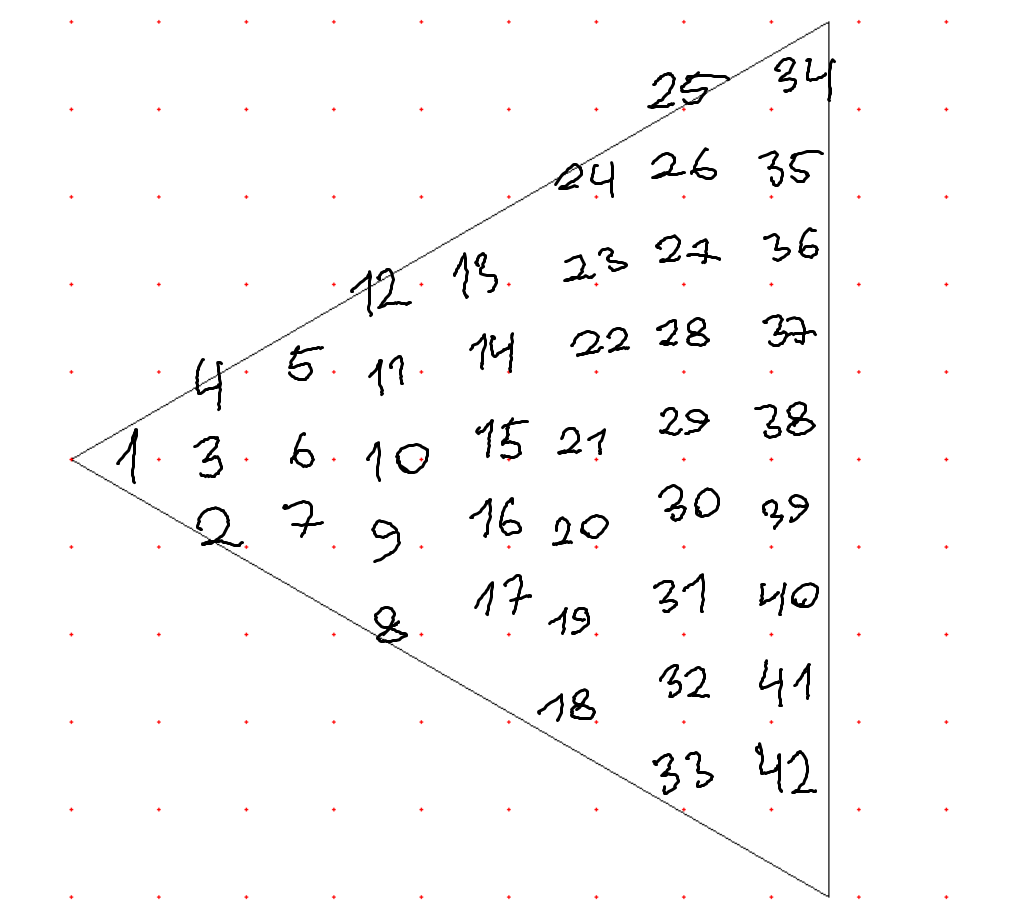

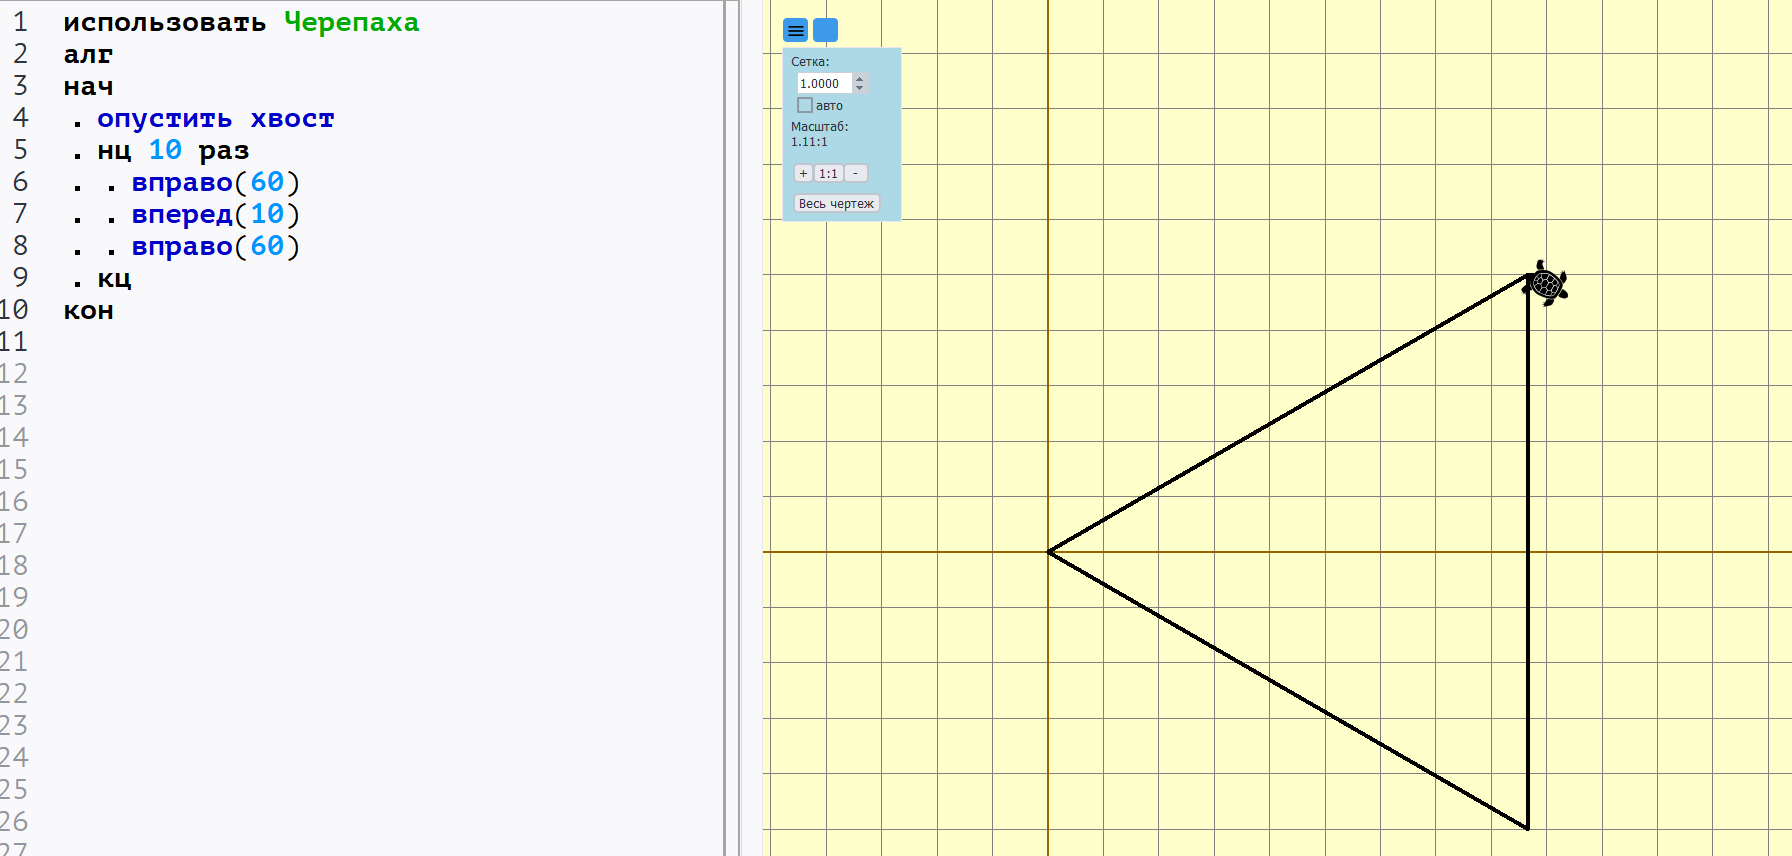

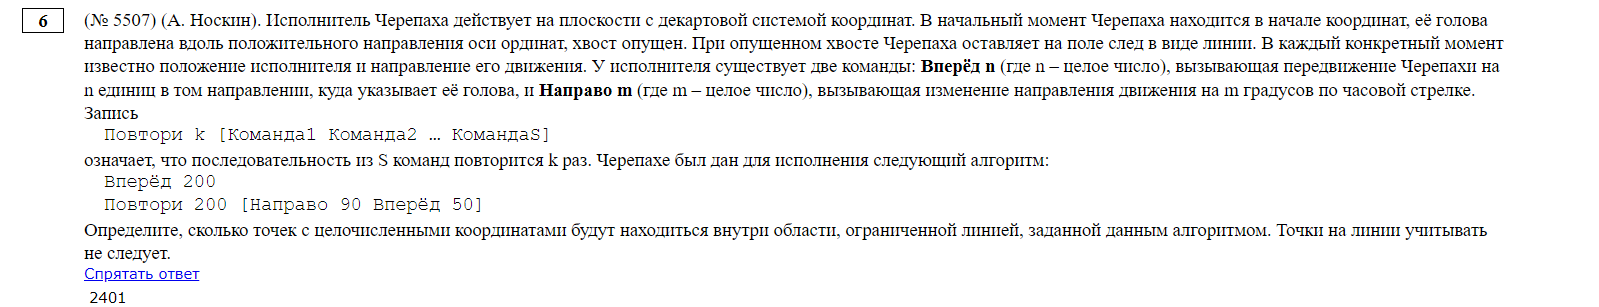

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
#fd(200*r) - не нужная команда
r = 10
t = 55
for i in range(200):
    rt(90)
    fd(50 * r)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "green")
update()
exitonclick()

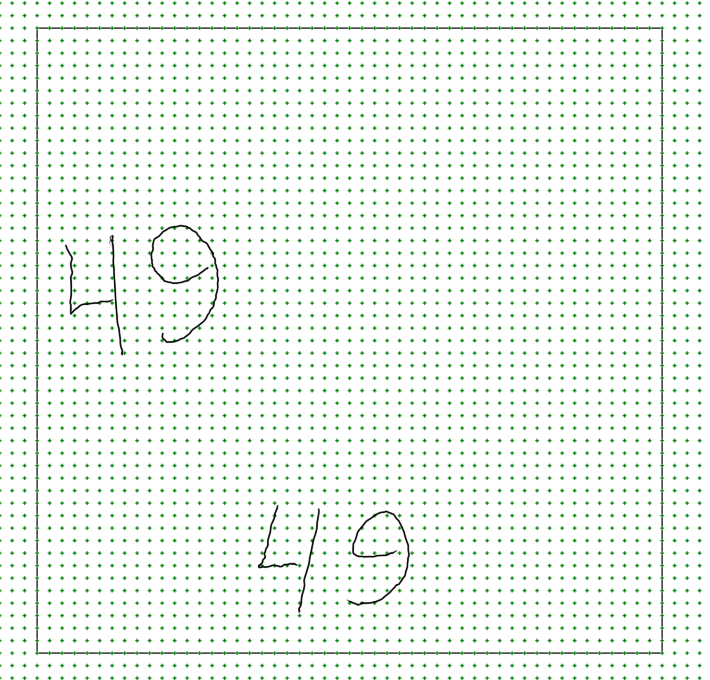

In [ ]:
ans = 49 * 49
ans

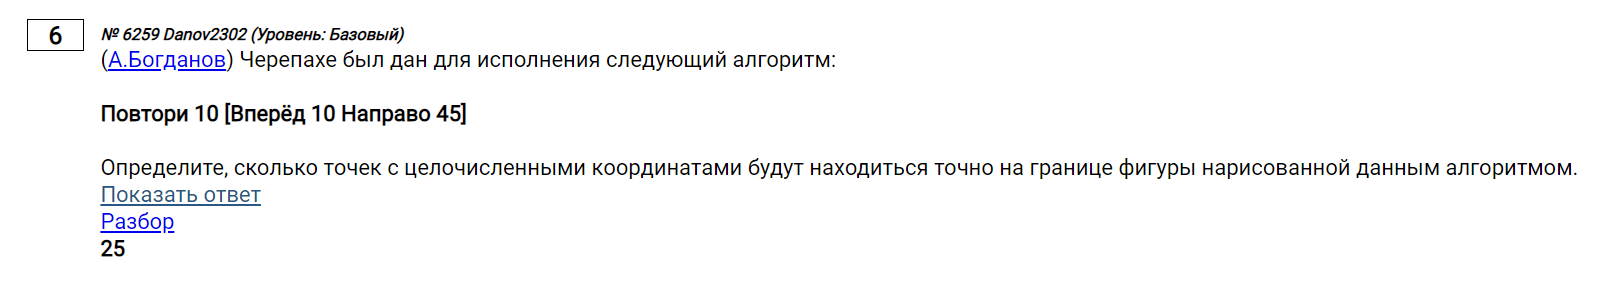

In [ ]:
from turtle import *

tracer(0)
lt(90)
r = 30
t = 40
screensize(3000, 3000)
for i in range(10):
    fd(10 * r)
    rt(45)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(4, "blue")
update()
exitonclick()

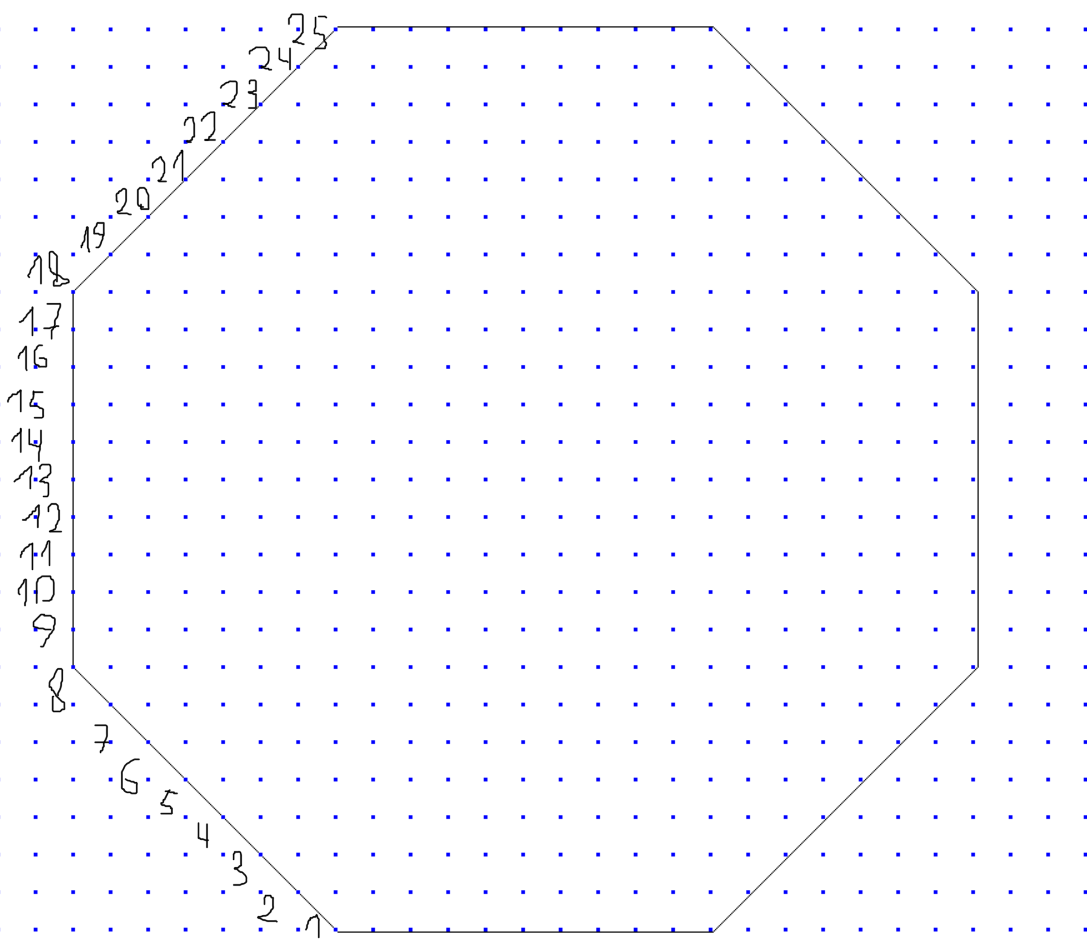

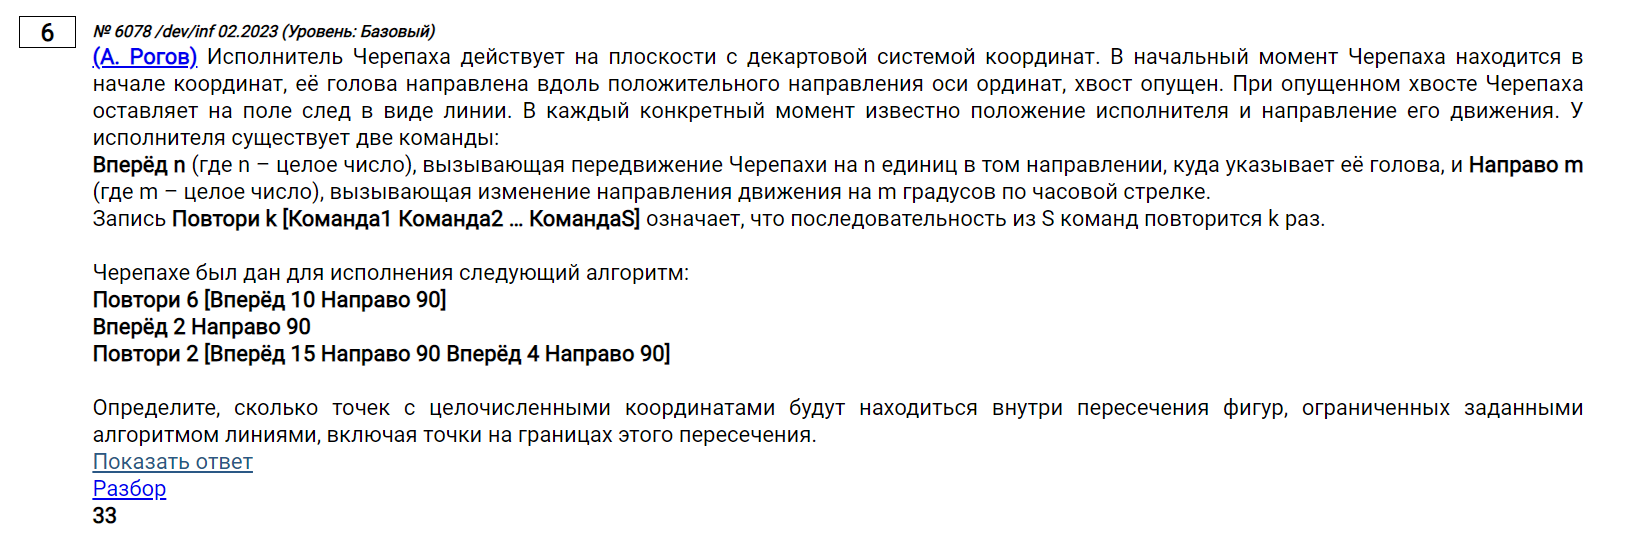

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
r = 50
t = 40
for i in range(6):
    fd(10 * r)
    rt(90)
fd(2 * r)
rt(90)

for i in range(2):
    fd(15 * r)
    rt(90)
    fd(4 * r)
    rt(90)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(4, "blue")
update()
exitonclick()

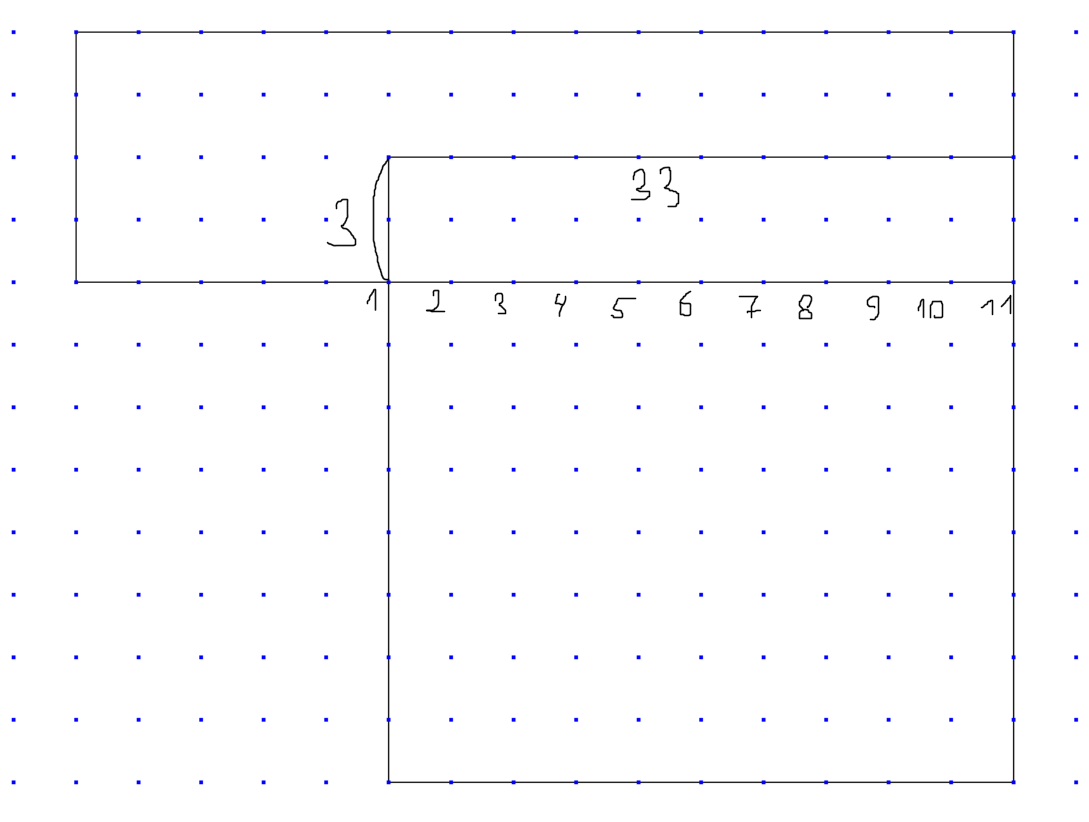

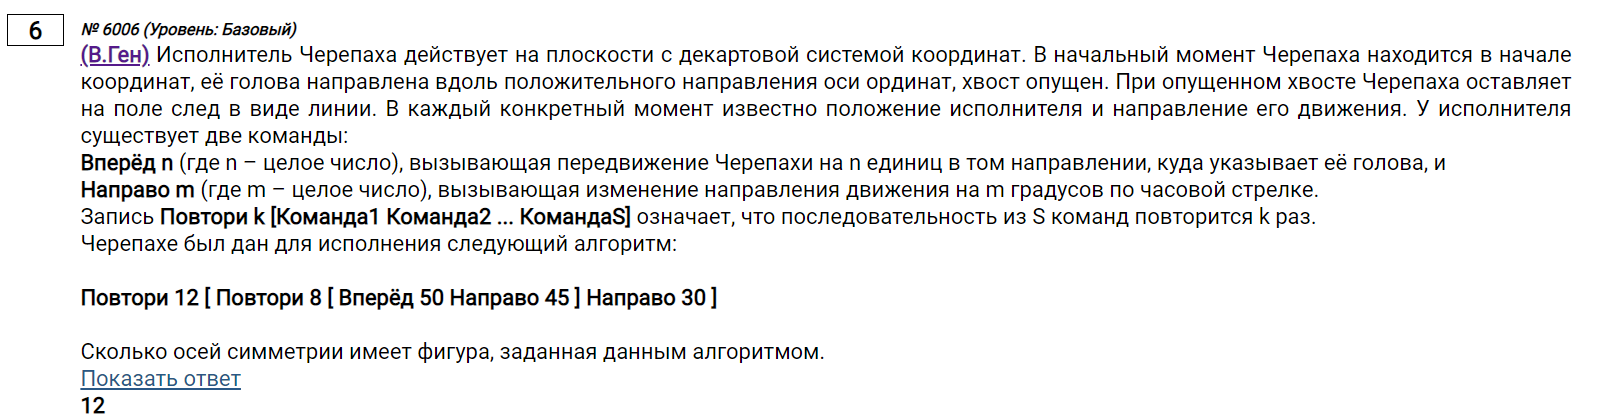

In [ ]:
from turtle import *

tracer(0)
screensize(2000, 2000)
lt(90)
r, t = 10, 50
for i in range(12):
    for i in range(8):
        fd(50 * r)
        rt(45)
    rt(30)

up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(4, "blue")
update()
exitonclick()

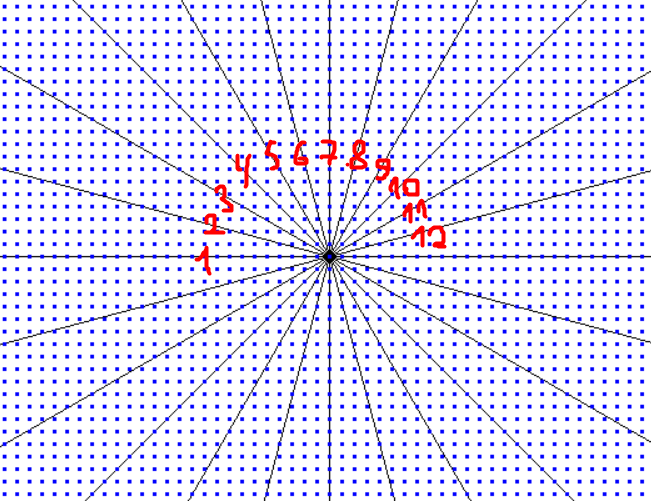

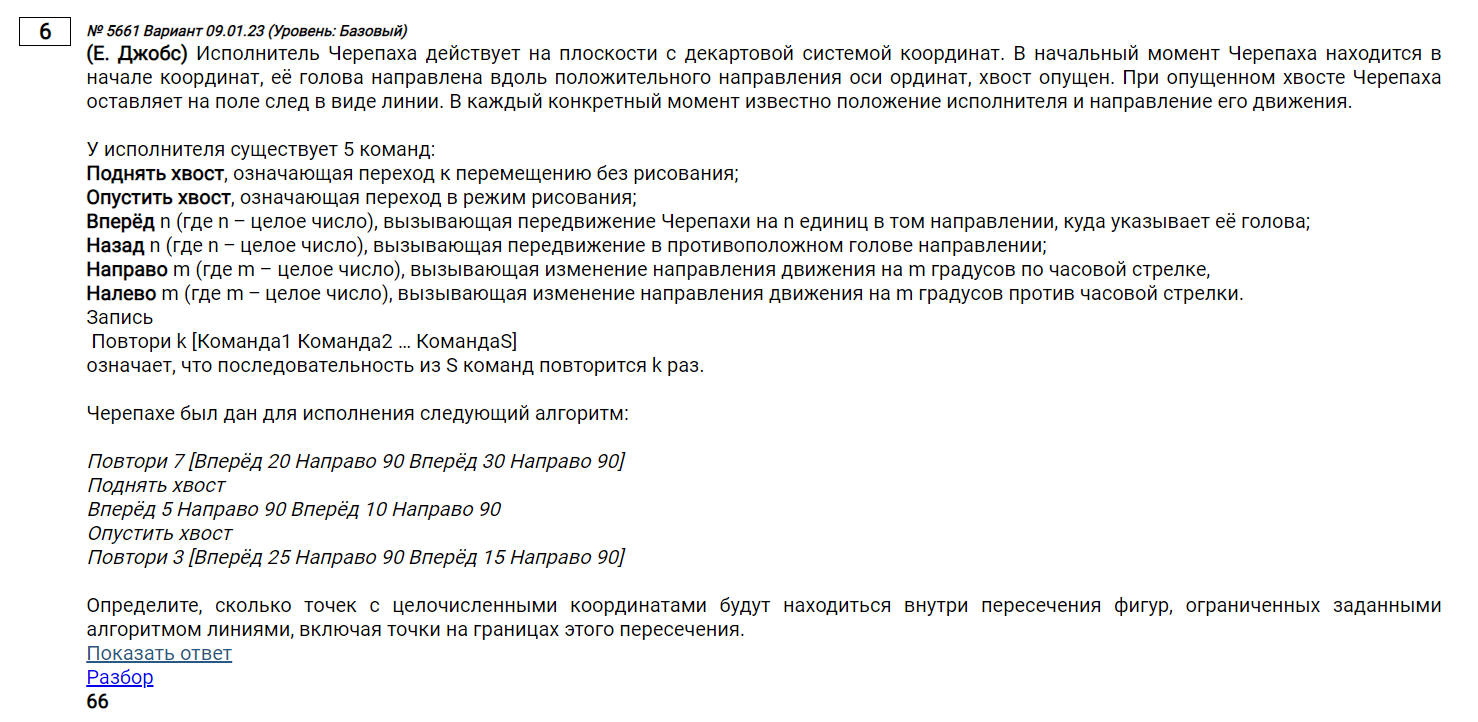

In [ ]:
from turtle import *

tracer(0)
screensize(2000, 2000)
lt(90)
r = 20
t = 40
for i in range(7):
    fd(20 * r)
    rt(90)
    fd(30 * r)
    rt(90)
up()
fd(5 * r)
rt(90)
fd(10 * r)
rt(90)
down()
for i in range(3):
    fd(25 * r)
    rt(90)
    fd(15 * r)
    rt(90)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "red")
update()
exitonclick()

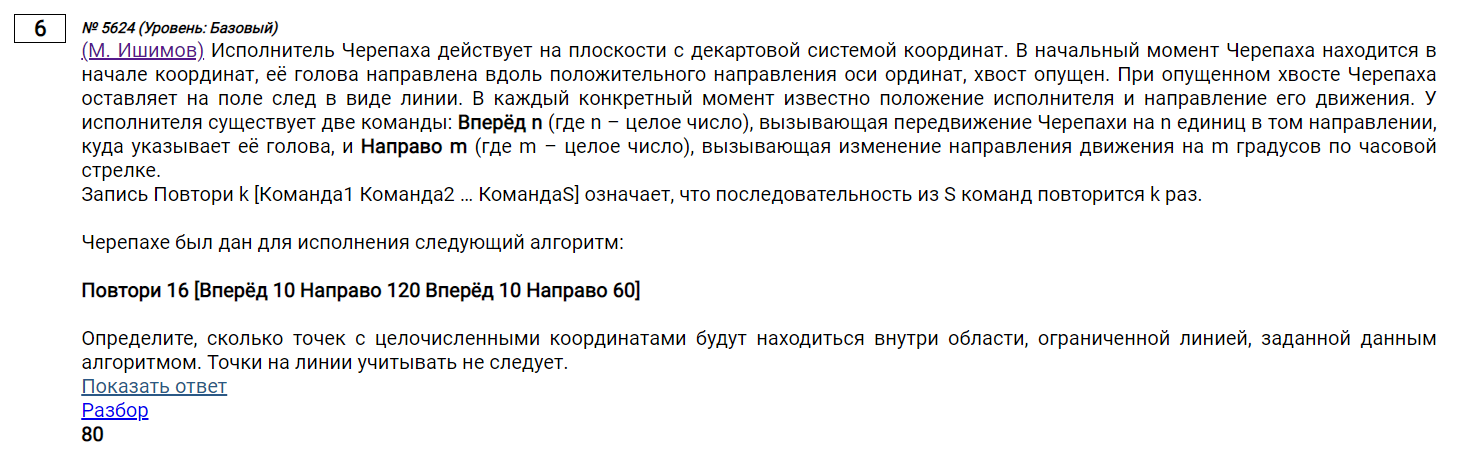

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
r = 40
t = 40
for i in range(16):
    fd(10 * r)
    rt(120)
    fd(10 * r)
    rt(60)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(2, "blue")
update()
exitonclick()

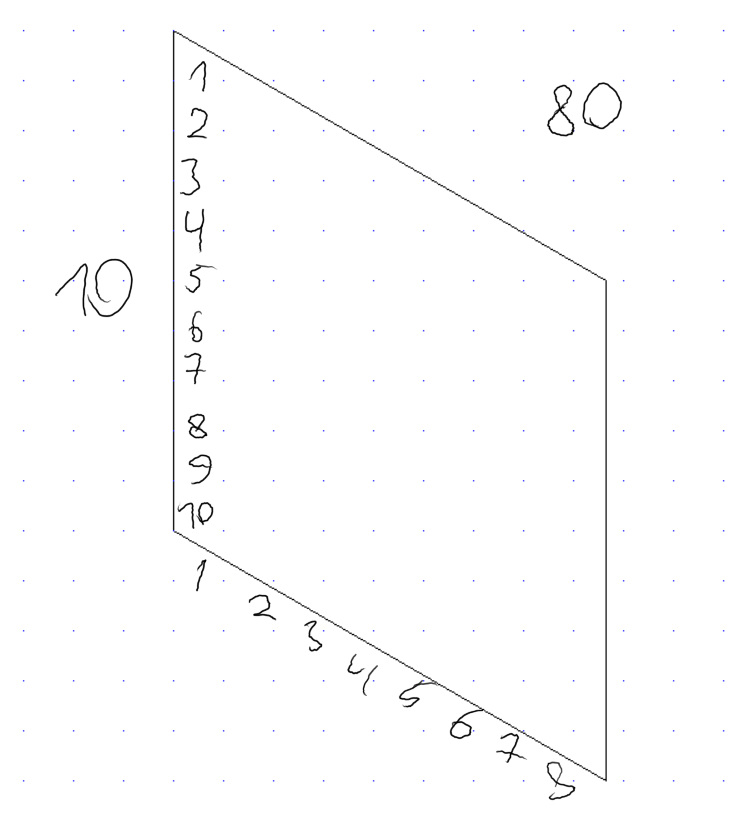

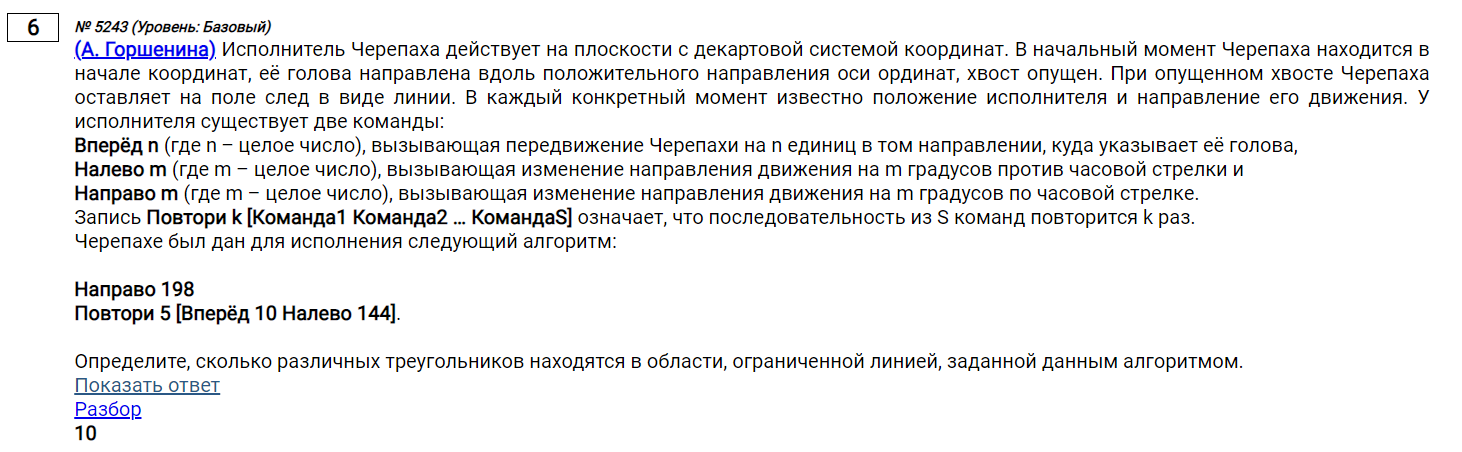

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
r = 50
t = 40
rt(198)
for i in range(5):
    fd(10 * r)
    lt(144)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "red")
update()
exitonclick()

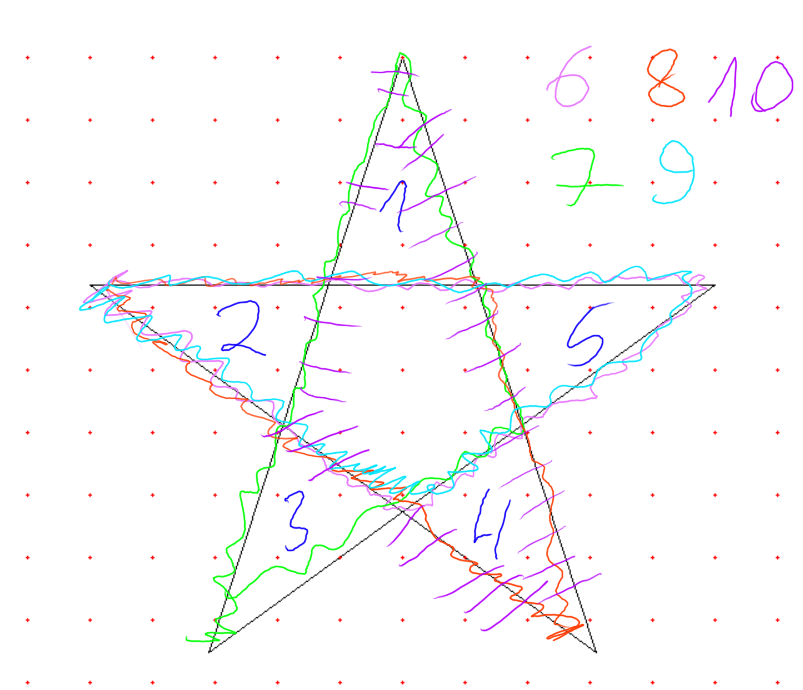

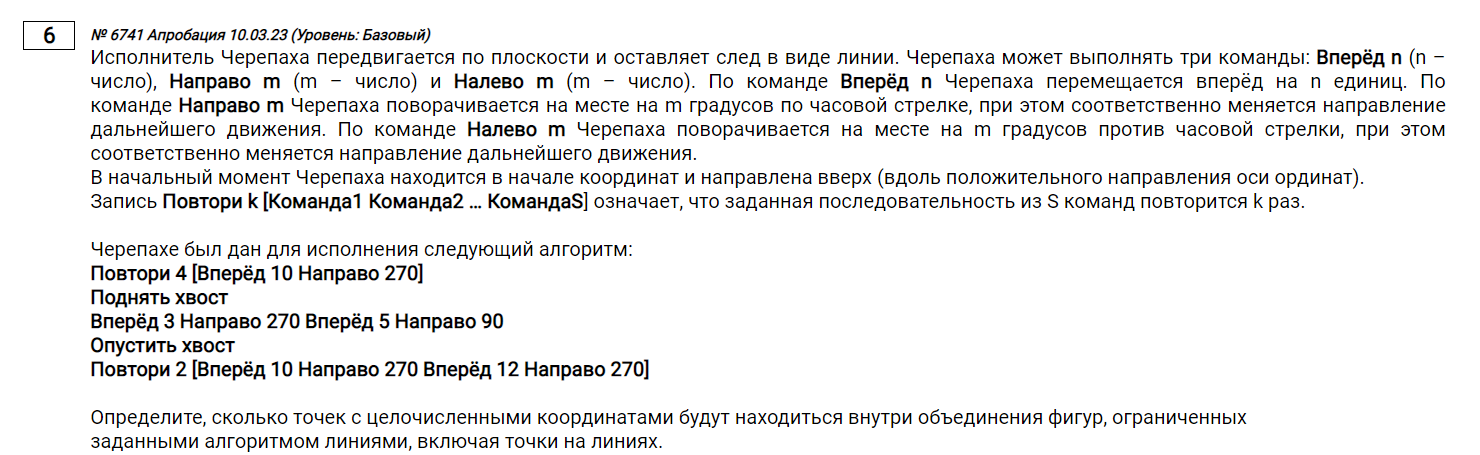

In [ ]:
from turtle import *

tracer(0)
lt(90)
screensize(2000, 2000)
r = 40
t = 40
for i in range(4):
    fd(10 * r)
    rt(270)
up()
fd(3 * r)
rt(270)
fd(5 * r)
rt(90)
down()
for i in range(2):
    fd(10 * r)
    rt(270)
    fd(12 * r)
    rt(270)
up()
for x in range(-t, t):
    for y in range(-t, t):
        goto(x * r, y * r)
        dot(3, "red")
update()
exitonclick()

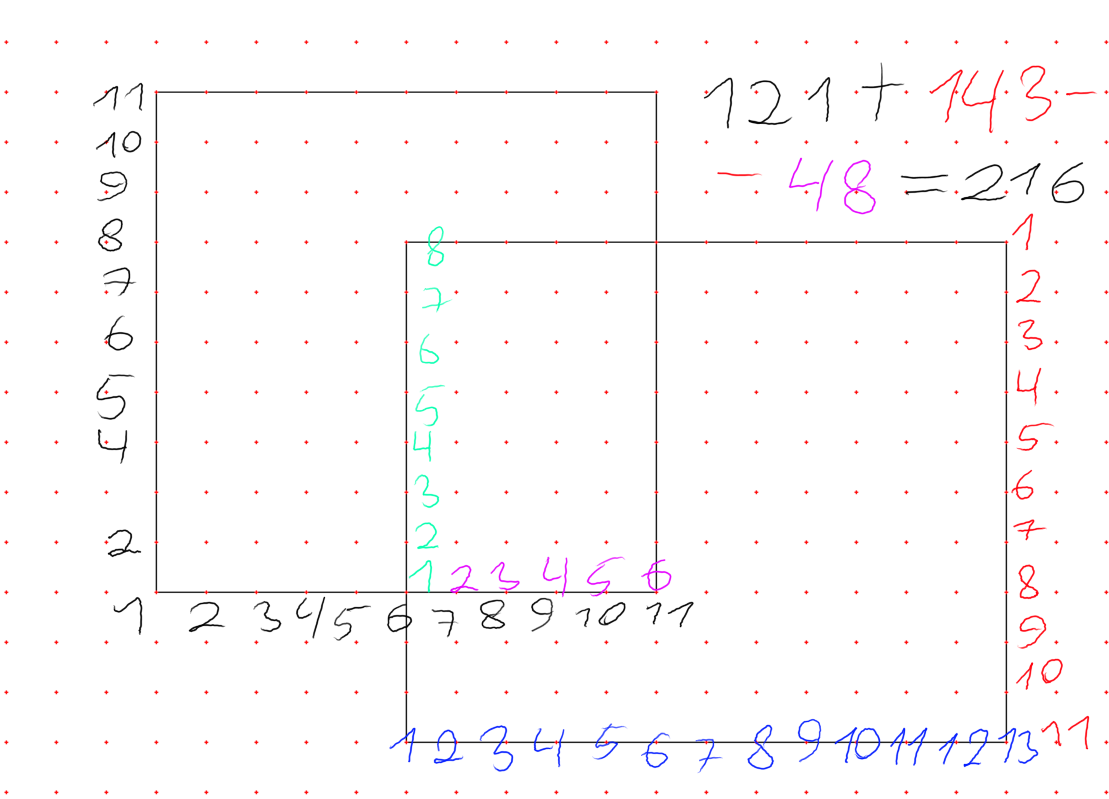

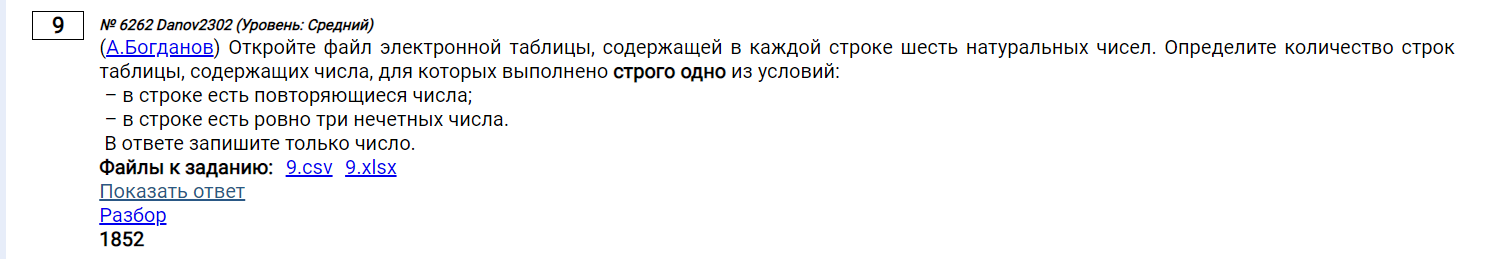

In [ ]:
a = [x.split() for x in open('9_6262.txt')]
count = 0
for numbers in a:
    t = sorted(int(x) for x in numbers)
    d = [i for i in t if t.count(i) > 1]
    nch = [i for i in t if i % 2 != 0]
    if len(d) > 1 and len(nch) != 3:
        count += 1
    if len(d) == 0 and len(nch) == 3:
        count += 1
print(count)

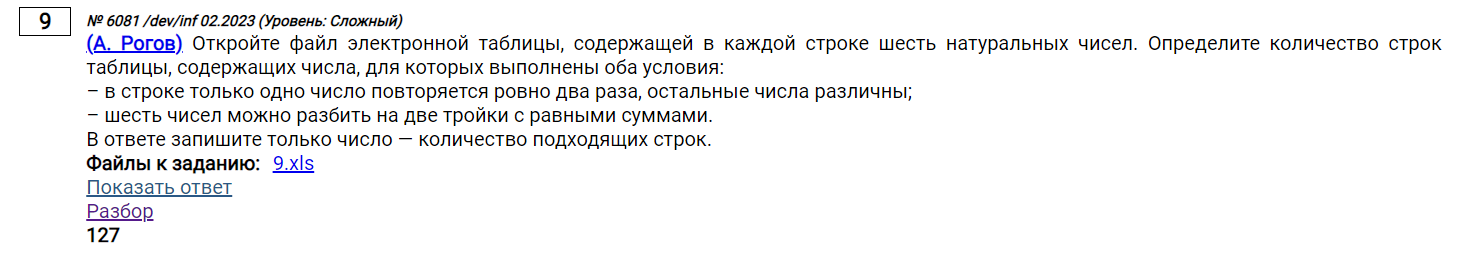

In [ ]:
from itertools import *

a = [x.split() for x in open('9_6081.txt')]
count = 0
for numbers in a:
    t = sorted(int(x) for x in numbers)
    d = [i for i in t if t.count(i) == 2]
    w = [i for i in permutations(t)]
    if len(set(d)) == 1 and len(set(t)) == 5:
        w = [i for i in permutations(t)]
        for x in w:
            if x[0] + x[1] + x[2] == x[3] + x[4] + x[5]:
                count += 1
                break
print(count)


In [ ]:
![image.png](attachment:image.png)

In [ ]:
a = [x.split() for x in open('09_6357.txt')]
count = 0
for numbers in a:
    t = sorted(int(x) for x in numbers)
    a = [x for x in t if t.count(x) > 1]
    b = [x for x in t if t.count(x) == 1]
    if len(a) + len(b) == 6:
        if len(b) != 0 and len(a) != 0:
            if (sum(b) / len(b)) < (sum(a) / len(a)):
                count += 1
print(count)